In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_cleaned_v1.csv')

In [4]:
df.duplicated().sum()

122

In [3]:
df.head(1)
# focus is on -> areaWithType, additionalRoom, agePossession, furnishDetails, features 

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,not available,2.0,NaN,0 to 1 Year Old,"['Sector 55-56 Metro Station', 'The Leaf Mall ...",NaN,"['Lift(s)', 'Park']"


## 1. areaWithType

In [5]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
2559,4.00,1836.0,Plot area 204(170.57 sq.m.)
1324,1.50,300.0,Built Up area: 300 (27.87 sq.m.)
561,9.00,2700.0,Plot area 300(250.84 sq.m.)
2984,1.25,1450.0,Carpet area: 1450 (134.71 sq.m.)
675,4.60,2610.0,Plot area 290(242.48 sq.m.)


In [6]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [7]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [8]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [9]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [10]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2337,1.31,flat,1538.0,Super Built up area 1538(142.88 sq.m.),1538.0,NaN,NaN
125,4.78,flat,3090.0,Super Built up area 3090(287.07 sq.m.)Built Up area: 2500 sq.ft. (232.26 sq.m.)Carpet area: 2250 sq.ft. (209.03 sq.m.),3090.0,2500.0,2250.0
239,4.49,house,1836.0,Plot area 204(170.57 sq.m.),NaN,NaN,NaN
1810,1.60,flat,2120.0,Super Built up area 2120(196.95 sq.m.)Carpet area: 1450 sq.ft. (134.71 sq.m.),2120.0,NaN,1450.0
2911,1.30,flat,1930.0,Super Built up area 1930(179.3 sq.m.),1930.0,NaN,NaN


In [11]:
df.duplicated().sum()

122

In [12]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [13]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,5.50,house,2546.0,Plot area 270(225.75 sq.m.),NaN,NaN,NaN
6,31.50,house,9000.0,Plot area 1000(836.13 sq.m.),NaN,NaN,NaN
7,0.40,house,450.0,Plot area 50(41.81 sq.m.),NaN,NaN,NaN
9,2.25,house,918.0,Plot area 102(85.28 sq.m.)Built Up area: 90 sq.yards (75.25 sq.m.)Carpet area: 85 sq.yards (71.07 sq.m.),NaN,90.0,85.0
11,1.07,house,900.0,Plot area 900(83.61 sq.m.),NaN,NaN,NaN


In [14]:
df.isnull().sum()

property_type             0
society                2187
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

In [15]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [16]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,5.50,house,2546.0,Plot area 270(225.75 sq.m.),NaN,NaN,NaN
6,31.50,house,9000.0,Plot area 1000(836.13 sq.m.),NaN,NaN,NaN
7,0.40,house,450.0,Plot area 50(41.81 sq.m.),NaN,NaN,NaN
11,1.07,house,900.0,Plot area 900(83.61 sq.m.),NaN,NaN,NaN
18,6.80,house,5400.0,Plot area 600(501.68 sq.m.),NaN,NaN,NaN


In [17]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [18]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [19]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [20]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,5.50,house,2546.0,Plot area 270(225.75 sq.m.),NaN,270.00,NaN
6,31.50,house,9000.0,Plot area 1000(836.13 sq.m.),NaN,1000.00,NaN
7,0.40,house,450.0,Plot area 50(41.81 sq.m.),NaN,50.00,NaN
11,1.07,house,900.0,Plot area 900(83.61 sq.m.),NaN,900.00,NaN
18,6.80,house,5400.0,Plot area 600(501.68 sq.m.),NaN,600.00,NaN
24,4.99,house,2642.0,Plot area 270(225.75 sq.m.),NaN,270.00,NaN
29,4.30,house,1467.0,Plot area 163(136.29 sq.m.),NaN,163.00,NaN
30,6.00,house,2430.0,Plot area 270(225.75 sq.m.),NaN,270.00,NaN
44,5.00,house,1467.0,Plot area 163(136.29 sq.m.),NaN,163.00,NaN
59,1.00,house,126.0,Plot area 126(11.71 sq.m.),NaN,126.00,NaN


In [21]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [22]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [24]:
all_nan_df.head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,5.50,house,2546.0,Plot area 270(225.75 sq.m.),NaN,2430.0,NaN
6,31.50,house,9000.0,Plot area 1000(836.13 sq.m.),NaN,9000.0,NaN
7,0.40,house,450.0,Plot area 50(41.81 sq.m.),NaN,450.0,NaN
11,1.07,house,900.0,Plot area 900(83.61 sq.m.),NaN,900.0,NaN
18,6.80,house,5400.0,Plot area 600(501.68 sq.m.),NaN,5400.0,NaN


In [25]:
# update the original dataframe
df.update(all_nan_df)

In [26]:
df.isnull().sum()

property_type             0
society                2187
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
dtype: int64

In [27]:
df.head(1)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,house,international city by sobha phase 1,sector 109,5.5,21605.0,2546.0,Plot area 270(225.75 sq.m.),4,4,3+,servant room,2.0,North-East,0 to 1 Year Old,"['Dwarka sector 21 metro station', 'Pacific D21 Mall', 'Dharampeth Main Road', 'Dwarka Expressway', 'The Shikshiyan School', 'The NorthCap University', ""Rion's Hospital"", 'Indira Gandhi International Airport', 'Gurgaon railway station', 'The Executive Centre', 'Luxus Haritma Resort', ""Oyster's Water Park"", 'BSF Golf Course']","['1 Fan', '1 Exhaust Fan', '1 Geyser', '1 Light', '1 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Maintenance Staff', 'Swimming Pool', 'Water Storage', 'Separate entry for servant room', 'Park', 'Visitor Parking', 'Security Personnel', 'Fitness Centre / GYM', 'Club house / Community Center']",NaN,2430.0,NaN


## 2.additionalRoom

In [28]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1587
Servant Room                                      627
Study Room                                        232
Others                                            177
Pooja Room                                        132
Study Room,Servant Room                            80
servant room                                       78
Store Room                                         75
Pooja Room,Servant Room                            60
pooja room,study room,servant room,store room      60
Servant Room,Others                                52
others                                             48
pooja room                                         33
pooja room,study room,servant room                 32
Servant Room,Pooja Room                            30
pooja room,study room,servant room,others          29
Study Room,Others                                  27
Pooja Room,Study Room,Servant Room,Others          25
store room   

In [29]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [30]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
2932,not available,0,0,0,0,0
1576,Servant Room,0,0,0,0,0
1758,Pooja Room,0,0,0,0,0
1893,not available,0,0,0,0,0
3053,"study room,servant room,pooja room",1,1,0,1,0


## 3.agePossession

In [31]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Oct 2024                 8
Jan 2024                 8
Dec 2025                 7
Aug 2023                 7
Jun 2024                 7
Nov 2023                 5
Jul 2024                 4
By 2025                  4
Sep 2023                 4
Oct 2023                 4
Aug 2024                 4
Jan 2025                 3
May 2024                 3
Feb 2024                 3
Nov 2024                 3
Sep 2025                 2
Dec 2026                 2
Jun 2027                 2
Jan 2026                 2
Mar 2025                 2
By 2027                  2
Jul 2027                 2
Apr 2026                 2
Aug 2025      

In [32]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [33]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [34]:
df['agePossession'].value_counts()

agePossession
Relatively New        1676
New Property           626
Moderately Old         575
Undefined              333
Old Property           310
Under Construction     283
Name: count, dtype: int64

## 4.furnishDetails

In [67]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
1881,NaN,"['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Water Storage', 'Park', 'Visitor Parking', 'Security Personnel', 'Shopping Centre']"
2225,NaN,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
1397,"['1 Bed', '3 Fan', '1 Sofa', '1 Exhaust Fan', '10 Light', '1 Curtains', '2 AC', 'No Chimney', 'No Dining Table', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center']"
3549,"['3 Wardrobe', '7 Fan', '1 Exhaust Fan', '4 Geyser', '1 Stove', '10 Light', '1 Chimney', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Waste Disposal', 'Rain Water Harvesting']"
2562,NaN,"['Private Garden / Terrace', 'Water Storage', 'Separate entry for servant room', 'Park', 'Piped-gas', 'Visitor Parking', 'Natural Light', 'Airy Rooms', 'Internet/wi-fi connectivity', 'Spacious Interiors', 'Low Density Society']"


In [68]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]


<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11936\2118040236.py:13: SyntaxWarning: invalid escape sequence '\d'
  pattern = re.compile(f"(\d+) {furnishing}")


In [69]:
furnishings_df.shape

(3803, 19)

In [70]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11936\114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [71]:
furnishings_df.sample(5)

,Bed,Sofa,Water Purifier,TV,Fridge,Washing Machine,Light,AC,Fan,Modular Kitchen,Chimney,Stove,Microwave,Geyser,Curtains,Exhaust Fan,Dining Table,Wardrobe
3033,1,1,0,0,0,0,7,0,3,1,0,0,0,0,1,0,0,0
865,0,0,0,0,0,0,22,3,6,1,1,0,0,3,0,1,0,2
186,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1817,0,0,0,0,0,0,3,3,0,0,0,0,0,0,0,0,0,0
1311,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [72]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [73]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [74]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

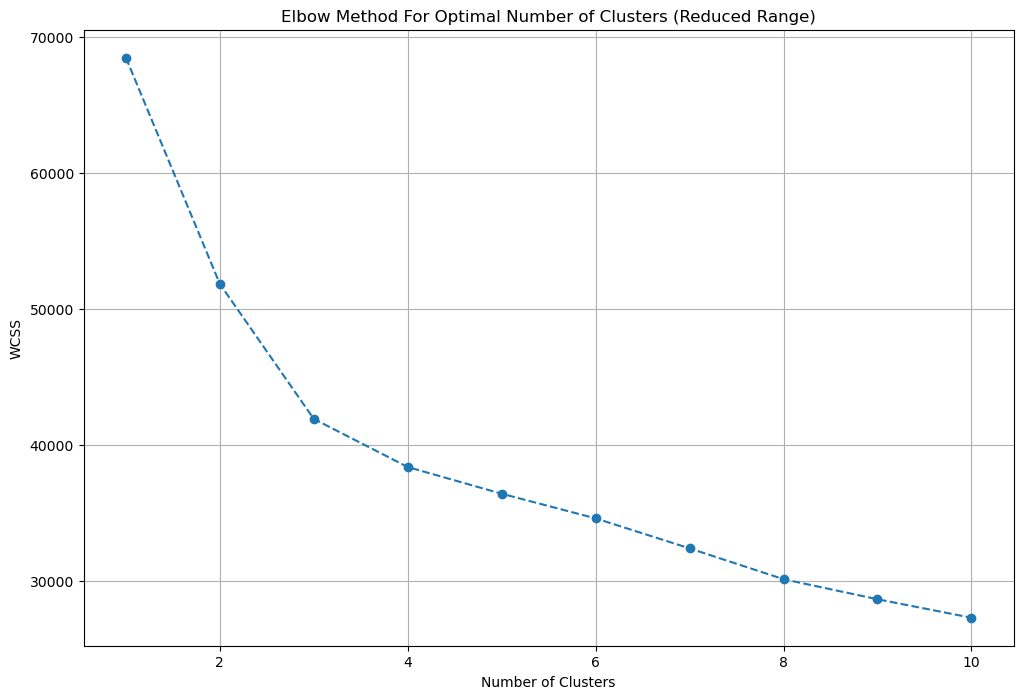

In [75]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [76]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [45]:
df = df.iloc[:,:-18]

In [46]:
df['furnishing_type'] = cluster_assignments

In [47]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
3349,NaN,0
649,"['4 Wardrobe', '6 Fan', '1 Exhaust Fan', '18 Light', '6 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",1
876,NaN,0
1690,"['1 Wardrobe', '2 Fan', '1 Exhaust Fan', '1 Geyser', '1 Light', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",1
1148,"['5 Fan', '1 Exhaust Fan', '5 Geyser', '1 Stove', '15 Light', '6 AC', '1 Chimney', '1 Curtains', '1 Modular Kitchen', '4 Wardrobe', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']",1


## 5.features

In [77]:
df[['society','features']].sample(5)

,society,features
571,luxury dlf city floors,"['High Ceiling Height', 'Park', 'Visitor Parking', 'Fitness Centre / GYM']"
837,ambience creacions,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
586,m3m crown,"['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"
3373,NaN,"['Power Back-up', 'Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Shopping Centre', 'Rain Water Harvesting']"
343,NaN,"['Power Back-up', 'Security / Fire Alarm', 'Intercom Facility', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Security Personnel', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']"


In [78]:
df['features'].isnull().sum()

525

In [79]:
import pandas as pd
app_df = pd.read_csv('appartments.csv')

In [80]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [53]:
temp_df = df[df['features'].isnull()]

In [54]:
temp_df.shape

(635, 26)

In [55]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [56]:
df.loc[temp_df.index,'features'] = x.values

In [57]:
df['features'].isnull().sum()

525

In [58]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [59]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [60]:
features_binary_df.sample(5)

,24/7 Power Backup,24x7 Security,ATM,Aerobics Centre,Airy Rooms,Amphitheatre,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Terrace Garden,Theatre,Toddler Pool,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
852,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
1897,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0
2913,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
1327,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
2747,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [61]:
features_binary_df.shape

(3803, 121)

In [62]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

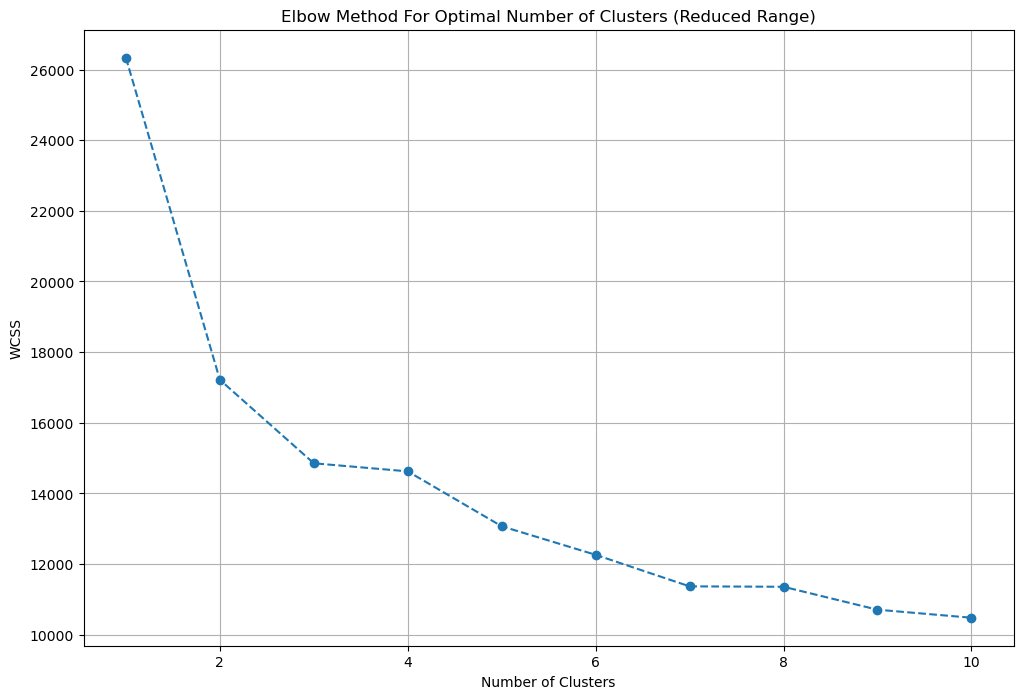

In [63]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [65]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)


KeyError: "['24/7 Water Supply', 'Car Parking', 'Multipurpose Hall', 'Temple', 'Valet Parking'] not in index"

In [66]:
df['luxury_score'] = luxury_score

NameError: name 'luxury_score' is not defined

In [550]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [552]:
df.shape

(3803, 23)

In [555]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)